# EXERCISES I:

In [9]:
import pandas as pd
import numpy as np
from env import host, user, password
from pydataset import data


url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [10]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


#### #1 Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [11]:
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'


In [ ]:
get_db_url(user,password,host, 'Mammals')
Mammals_url = get_db_url(user,password,host, 'Mammals')

In [4]:
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
url = get_db_url(user,password,host, 'employees')

#### #2 Use your function to obtain a connection to the employees database.

In [6]:
get_db_url(user,password,host, 'employees')
emp_url = get_db_url(user,password,host, 'employees')

#### #3 Once you have successfully run a query:

#### #3.a Intentionally make a typo in the database url. What kind of error message do you see?

In [7]:
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
url = get_db_url(user,pasword,host, 'employees')

NameError: name 'pasword' is not defined

#### #3.b. Intentionally make an error in your SQL query. What does the error message look like?

In [ ]:
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
url = get_db_url(user,password,host, 'emplyees')   

#### #4 Read the employees and titles tables into two separate DataFrames.

In [12]:
employees_df = pd.read_sql('SELECT * FROM employees LIMIT 5', url)
employees_df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [ ]:
titles_df = pd.read_sql('SELECT * FROM titles LIMIT 5', url)
titles_df

In [ ]:
employees_df = pd.read_sql('SELECT * FROM employees', url)
titles_df = pd.read_sql('SELECT * FROM titles', url)

#### #5 How many rows and columns do you have in each DataFrame? Is that what you expected?

In [ ]:
employees_df.shape

In [ ]:
titles_df.shape

#### #6 Display the summary statistics for each DataFrame

In [ ]:
employees_df.describe()

In [ ]:
employees_df.describe(include = 'all')

In [ ]:
#this includes the desciption of only the int columns
employees_df.describe(exclude = np.number)

#### #7 How many unique titles are in the titles DataFrame?

In [ ]:
titles_df['title'].unique()
#this shows WHAT the unique titles are

In [ ]:
len(titles_df['title'].unique())
#this shows HOW MANY unique titles there are

#### #8 What is the oldest date in the to_date column?

In [ ]:
#this is one way
titles_df.to_date.sort_values().head(1)

In [ ]:
#another way
titles_df.to_date.min()

In [ ]:
#another way
min(titles_df['to_date'])

#### #9 What is the most recent date in the to_date column?

In [ ]:
max(titles_df['to_date'])

# EXERCISES II:

#### #1 Copy the users and roles DataFrames from the examples above.

In [11]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [12]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


#### #2 What is the result of using a right join on the DataFrames?

In [13]:
(users.merge(roles, 
            left_on='role_id', 
            right_on='id', 
            how='right')    
)

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [14]:
#just out of curiosity- left join
(users.merge(roles, 
            left_on='role_id', 
            right_on='id', 
            how='left')    
)

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


#### #3 What is the result of using an outer join on the DataFrames?

In [17]:
(users.merge(roles, 
            left_on='role_id', 
            right_on='id', 
            how='outer')
    .rename(columns={'id_x': 'id', 
                     'name_x': 'employee',
                     'id_y': 'role_id',
                     'name_y': 'role'}
            )
)
#cleaned up with renamed columns

,id,employee,role_id,role_id,role
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


#### #4 What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [21]:
users.merge(roles, how = 'outer', indicator=True)
#role name (job role), went under 'name'

,id,name,role_id,_merge
0,1,bob,1.0,left_only
1,2,joe,2.0,left_only
2,3,sally,3.0,left_only
3,4,adam,3.0,left_only
4,5,jane,NaN,left_only
5,6,mike,NaN,left_only
6,1,admin,NaN,right_only
7,2,author,NaN,right_only
8,3,reviewer,NaN,right_only
9,4,commenter,NaN,right_only


#### #5 Load the mpg dataset from PyDataset.

In [23]:
from pydataset import data

In [25]:
mpg_df = data('mpg')

#### #6 Output and read the documentation for the mpg dataset.

In [27]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [33]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




#### #7 How many rows and columns are in the dataset?

In [28]:
mpg_df.shape
#234 columns
#11 rows

(234, 11)

#### #8 Check out your column names and perform any cleanup you may want on them.

In [34]:
mpg_clean = mpg_df.rename(columns ={'cty':'city', 'hwy':'highway'})
#replaced cty with city, and hwy with highway

mpg_df.columns = map(str.title, mpg_clean.columns)
# this capitalizes first letter of column titles

mpg_clean

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,City,Highway,Fl,Class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
#rename new columns quickly
# mpg.columns = ['manufacturer', 'model', 'displacement', 'year', 'cylinders', 'transmission', 'drive', 'city','highway', 'fuel', 'class']

#### #9 Display the summary statistics for the dataset.

In [30]:
mpg_df.describe()

,Displ,Year,Cyl,City,Highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


#### #10 How many different manufacturers are there?

In [35]:
#My proccess:
#first, I asked myself how to retrieve JUST the manufacturers
mpg_df['Manufacturer']
#this is called "bracket notation"

1            audi
2            audi
3            audi
4            audi
5            audi
          ...    
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
234    volkswagen
Name: Manufacturer, Length: 234, dtype: object

In [36]:
#then, I found out what the unique manufacturers were
mpg_df['Manufacturer'].unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [37]:
#then, I wrapped that in a 'len' to get the count of unique manufacturers
len(mpg_df['Manufacturer'].unique())

15

In [40]:
#ANOTHE WAY:
mpg_df.Manufacturer.nunique()
#nunique() gives you the count of unique without 'len'

15

#### #11 How many different models are there?

In [41]:
len(mpg_df['Model'].unique())

38

In [42]:
#another way to do it
len(mpg_df['Model'].value_counts())

38

In [43]:
#a third way to do this
mpg_df.Model.nunique()

38

#### #12 Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [44]:
mpg_df['mileage_difference'] = mpg_df['Highway']- mpg_df['City']
mpg_df

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,City,Highway,Fl,Class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


#### #13 Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [45]:
mpg_df['average_mileage'] = (mpg_df['Highway'] + mpg_df['City']) / 2
mpg_df

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,City,Highway,Fl,Class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


In [52]:
#another way
mpg_df['average_mileage'] = mpg_df[['Highway', 'City']].mean(axis=1)
mpg_df.head()

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,City,Highway,Fl,Class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


#### #14 Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

In [58]:
mpg_df['is_automatic'] = mpg_df['Trans'].str.contains('auto')                     
mpg_df

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,City,Highway,Fl,Class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


#### #15 Using the mpg dataset, find out which manufacturer has the best miles per gallon on average?

In [59]:
mpg_df.sort_values(['average_mileage'], ascending =(False)).head(1)

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,City,Highway,Fl,Class,mileage_difference,average_mileage,is_automatic
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,9,39.5,False


In [49]:
mpg_df.groupby('Manufacturer').average_mileage.agg('mean')

Manufacturer
audi          22.027778
chevrolet     18.447368
dodge         15.540541
ford          16.680000
honda         28.500000
hyundai       22.750000
jeep          15.562500
land rover    14.000000
lincoln       14.166667
mercury       15.625000
nissan        21.346154
pontiac       21.700000
subaru        22.428571
toyota        21.720588
volkswagen    25.074074
Name: average_mileage, dtype: float64

#### #16 Do automatic or manual cars have better miles per gallon?

In [53]:
mpg_df.sort_values(['average_mileage'], ascending =(False)).head(10)
# 6 out of top 10 are NOT automatic
# Manual have best mileage

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,City,Highway,Fl,Class,mileage_difference,average_mileage
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,9,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11,38.5
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12,35.0
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,9,32.5
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,9,30.5
106,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,11,30.5
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,5,30.5
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,9,30.5
105,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,8,30.0
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,12,30.0


In [60]:
is_auto=mpg_df.groupby("is_automatic").agg('mean')
is_auto

#False/is not auto/Manual: average_mileage = 22.227273
#True/is auto" average_mileage = 19.130573

,Displ,Year,Cyl,City,Highway,mileage_difference,average_mileage
is_automatic,,,,,,,
False,2.966234,2002.974026,5.246753,18.675325,25.779221,7.103896,22.227273
True,3.719745,2003.757962,6.203822,15.968153,22.292994,6.324841,19.130573


# EXERCISES III:

#### #1 Use your get_db_url function to help you explore the data from the chipotle database.

In [13]:
url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [14]:
pd.read_sql('SELECT * FROM orders LIMIT 5 OFFSET 50', url)

,id,order_id,quantity,item_name,choice_description,item_price
0,51,23,1,Steak Burrito,"[Roasted Chili Corn Salsa (Medium), [Rice, Fajita Veggies, Cheese, Sour Cream, Lettuce]]",$8.99
1,52,23,2,Canned Soda,[Mountain Dew],$2.18
2,53,24,1,Chicken Burrito,"[Roasted Chili Corn Salsa (Medium), [Black Beans, Rice, Fajita Veggies, Cheese, Sour C...",$10.98
3,54,24,1,Canned Soda,[Sprite],$1.09
4,55,25,1,Steak Bowl,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice, Fajita Veggies, Cheese, Sour Cream]]",$8.99


In [15]:
chipotle_df = pd.read_sql('SELECT * FROM orders', url)
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [2]:
chipotle_sql_query = '''
                    SELECT *
                    FROM orders;
                    '''

In [16]:
chipotle_df.describe()

,id,order_id,quantity
count,4622.000000,4622.000000,4622.000000
mean,2311.500000,927.254868,1.075725
std,1334.400802,528.890796,0.410186
min,1.000000,1.000000,1.000000
25%,1156.250000,477.250000,1.000000
50%,2311.500000,926.000000,1.000000
75%,3466.750000,1393.000000,1.000000
max,4622.000000,1834.000000,15.000000


In [17]:
chipotle_df.columns

Index(['id', 'order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### #2 What is the total price for each order?

In [18]:
chipotle_df[['item_price', 'order_id']]

,item_price,order_id
0,$2.39,1
1,$3.39,1
2,$3.39,1
3,$2.39,1
4,$16.98,2
...,...,...
4617,$11.75,1833
4618,$11.75,1833
4619,$11.25,1834
4620,$8.75,1834


In [19]:
chipotle_df['item_price'] = chipotle_df.item_price.str.replace('$', '').astype(float)
chipotle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


In [21]:
order_totals = chipotle_df.groupby('order_id').item_price.sum()
order_totals.sample(10)

order_id
1737    33.75
1447    16.98
984     14.95
620     20.50
1775    28.75
1147    10.68
1745    28.90
1015    13.40
1676    14.95
1717    22.65
Name: item_price, dtype: float64

#### #3 What are the most popular 3 items?

In [32]:
chipotle_df.groupby('item_name').quantity.sum().sort_values(ascending = False).nlargest(n=3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

#### #4 Which item has produced the most revenue?

In [22]:
chipotle_df.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
1146,1147,473,1,Steak Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream]]",9.25
677,678,280,1,Veggie Bowl,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]",8.49
2667,2668,1059,1,Barbacoa Bowl,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Lettuce]]",9.25
4156,4157,1660,1,Chips and Tomatillo Red Chili Salsa,nan,2.95
491,492,206,1,Steak Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]",11.75


In [24]:
chipotle_df.groupby('item_name').item_price.sum().nlargest(1, keep='all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

#### #5 Using the titles DataFrame, visualize the number of employees with each title.

In [26]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [27]:
titles_df = pd.read_sql('SELECT * FROM titles', url)

In [29]:
titles_df['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [31]:
titles_df.head(1)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01


In [32]:
current_bool = titles_df.to_date == titles_df.to_date.max()
current_bool.head()

0     True
1     True
2     True
3    False
4     True
Name: to_date, dtype: bool

In [34]:
current_employee_titles = titles_df[current_bool]
current_employee_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01


In [35]:
current_title_values = current_employee_titles.title.value_counts()
current_title_values

Senior Engineer       85939
Senior Staff          82024
Engineer              30983
Staff                 25526
Technique Leader      12055
Assistant Engineer     3588
Manager                   9
Name: title, dtype: int64

NameError: name 'plt' is not defined

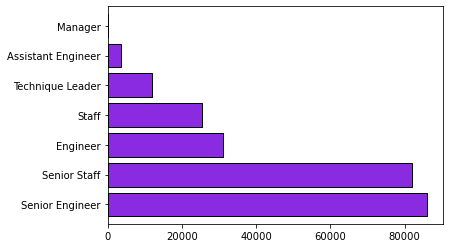

In [36]:
current_title_values.plot.barh(color='blueviolet', 
                               ec='black', 
                               width=.8)
plt.title('Count of Current Employees Who Hold Each Title')
plt.xlabel('Number of Employees')
plt.gca().invert_yaxis()

plt.show()

#### #6 Join the employees and titles DataFrames together.

In [30]:
emp_and_titles = employees.merge(titles, how = 'inner', on ='emp_no', indicator= True)

NameError: name 'employees' is not defined

#### #7 Visualize how frequently employees change titles.

In [ ]:
title_count = emp_and_titles.groupby('emp_no').title.count().value_counts()


In [ ]:
emp_and_titles.title.count()

#### #8 For each title, find the hire date of the employee that was hired most recently with that title.

In [44]:
emp_and_titles.groupby('title').hire_date.max()

NameError: name 'emp_and_titles' is not defined

#### #9 Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [ ]:
the_df